<a href="https://colab.research.google.com/github/cloudhood/learning-basics/blob/main/notebooks/knn_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
!pip install --upgrade ipython nb_black &> /dev/null

In [5]:
%load_ext nb_black

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.neighbors import NearestNeighbors

from sklearn.preprocessing import StandardScaler

In [47]:
# Load data
iris = datasets.load_iris()
features = iris.data

# Create standardizer
standardizer = StandardScaler()

# Standardize features
features_standardized = standardizer.fit_transform(features)

# Two nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=2).fit(features_standardized)

# Create an observation
new_observation = [ 1,  1,  1,  1]

# Find distances and indices of the observation's nearest neighbors
distances, indices = nearest_neighbors.kneighbors([new_observation])

# View the nearest neighbors
features_standardized[indices]

In [51]:
features[indices[0]]

array([[6.7, 3.3, 5.7, 2.1],
       [6.5, 3.2, 5.1, 2. ]])

In [48]:
# List of lists indicating each observation's 3 nearest neighbors
# (including itself)
nearest_neighbors_with_self = nearestneighbors_euclidean.kneighbors_graph(
    features_standardized
).toarray()

# Remove 1's marking an observation is a nearest neighbor to itself
for i, x in enumerate(nearest_neighbors_with_self):
    x[i] = 0

# View first observation's two nearest neighbors
nearest_neighbors_with_self[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

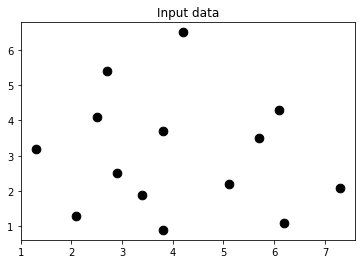

In [60]:
X = np.array([[2.1, 1.3], [1.3, 3.2], [2.9, 2.5], [2.7, 5.4], [3.8, 0.9], 
        [7.3, 2.1], [4.2, 6.5], [3.8, 3.7], [2.5, 4.1], [3.4, 1.9],
        [5.7, 3.5], [6.1, 4.3], [5.1, 2.2], [6.2, 1.1]])
k = 5
test_data_point = np.array([4.3, 2.7])

plt.figure()
plt.title('Input data')
plt.scatter(X[:,0], X[:,1], marker='o', s=75, color='black')

In [61]:
knn_model = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X) 
distances, indices = knn_model.kneighbors(test_data_point.reshape(1, -1))

In [62]:
# Print the 'k' nearest neighbors
print("\nK Nearest Neighbors:")
for rank, index in enumerate(indices[0][:k], start=1):
    print(str(rank) + " ==>", X[index])


K Nearest Neighbors:
1 ==> [5.1 2.2]
2 ==> [3.8 3.7]
3 ==> [3.4 1.9]
4 ==> [2.9 2.5]
5 ==> [5.7 3.5]


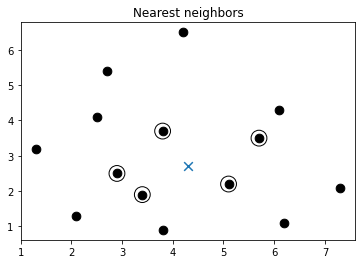

In [65]:
# Visualize the nearest neighbors along with the test datapoint
plt.figure()
plt.title('Nearest neighbors')
plt.scatter(X[:, 0], X[:, 1], marker='o', s=75, color='k')
plt.scatter(X[indices][0][:][:, 0], X[indices][0][:][:, 1],
        marker='o', s=250, color='k', facecolors='none')
plt.scatter(test_data_point[0], test_data_point[1],
        marker='x', s=75)
plt.show()

In [66]:
from scipy.spatial.distance import pdist
nb_samples = 100
nb_bins = 100
def max_min_mean(p=1.0, d=2):
    Xs = np.random.uniform(0.0, 1.0,
         size=(nb_bins, nb_samples, d))
    pd_max = np.zeros(shape=(nb_bins,))
    pd_min = np.zeros(shape=(nb_bins,))
    for i in range(nb_bins):
        pd = pdist(Xs[i], metric='minkowski', p=p)
        pd_max[i] = np.max(pd)
        pd_min[i] = np.min(pd)
    return np.mean(pd_max - pd_min)

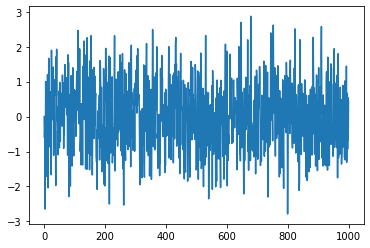

In [97]:
def ar1(rng, n=1000, rho=.9, plot=True):
  eps = rng.normal(size=steps)
  y = np.zeros(steps)
  for i in range(1, len(e)):
    y[i] = rho * y[i] + e[i]
  if plot:
    plt.plot(y)
    plt.show()
  return y
x = ar1(rng=rng)

# K-Nearest Neighbours
Instance-based learning. There is no parametrized model, but rather a _rearrangement_ of the samples to speed up specific queries. The brute force approach to finding a radius neighbourhood of a test sample $x_i$ would be:

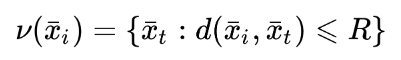



The set $v(\bar{x}_i)$ is a _ball_ centred on $x_i$ and includes all samples whose distance is less than or equal to $R$. We can also compute only the top $k$ nearest neighbours, which are the $k$ samples closer to $x_i$. Unfortunately this is too computationally expensive as it involves computing $M^2$ $N$-dimensional distances, assuming $N$ operations per distance - giving a complexity of $O(NM^2)$.

The first alternative approach is **kd-trees**, which are a natural extension of binary trees to multi-dimensional datasets.

## Content-based systems
* Based only on products modelled as $m$-dimensional feature vectors: 

$$I = \{\bar{i}_1, \bar{i}_2, \ldots, \bar{i}_n\}\ \mathrm{where} \ \bar{i}_j \in \mathbb{R}^m$$

In [7]:
rng = np.random.default_rng(seed=123)

In [28]:
# Generate dummy product data with 1,000 samples and 4 integer features 
# between 0 and 100.
n_items = 1_000
n_features = 4
items = np.zeros(shape=(n_items, n_features))

for i in range(n_items):
    for j in range(n_features):
        items[i, j] = rng.integers(0, 100)

nn = NearestNeighbors(n_neighbors=10, radius=5.0)
nn.fit(items)

NearestNeighbors(n_neighbors=10, radius=5.0)

In [31]:
test_product = np.array([15, 60, 28, 73])
test_product_r = test_product.reshape(1, -1)

d, suggestions = nn.radius_neighbors(test_product_r, radius=20)
print(suggestions)

d, suggestions = nn.radius_neighbors(test_product_r, radius=30)
print(suggestions)

[array([373, 420, 634,   3,  31, 267, 144, 639])]
[array([191, 548,  75, 101,   8, 829, 441, 166, 579, 529, 187, 368, 221,
        251, 526, 753, 373, 902, 420, 634,   3,  31, 267, 269, 144, 639,
        560, 256,  70, 377, 646, 833, 714, 456, 706,  78])              ]


In [35]:
# Difference distances may be used depending on the data. For example,
# the Hamming distance measures the proportion of disagreement between
# two vectors (if they are binary, this is the normalized number of different
# bits). This can be useful when we need to compare itens where the representation
# is made up of binary states.
from scipy.spatial.distance import hamming

a = np.array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0])
b = np.array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0])
d = hamming(a, b)

print(d)

0.4


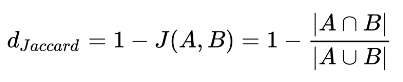

In [34]:
# The Jaccard distance measures the dissimilarity between two different 
# sets A and B.
from scipy.spatial.distance import jaccard

d = jaccard(a, b)
print(d)
0.5714285714285714

0.5714285714285714


0.5714285714285714

In [44]:
for m in ('minkowski', 'hamming', 'jaccard'):
    nn = NearestNeighbors(n_neighbors=10, radius=5.0, metric=m)
    nn.fit(items)

In [9]:
X = np.array(
    [
        [2.1, 1.3], [1.3, 3.2], [2.9, 2.5], [2.7, 5.4], [3.8, 0.9],  
        [7.3, 2.1], [4.2, 6.5], [3.8, 3.7], [2.5, 4.1], [3.4, 1.9], 
        [5.7, 3.5], [6.1, 4.3], [5.1, 2.2], [6.2, 1.1]
     ]
) 

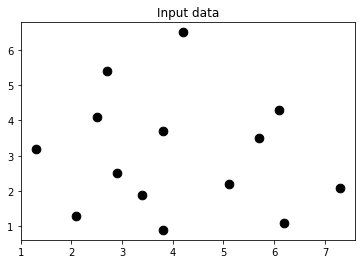

In [15]:
k = 5 
test_datapoint = np.array([4.3, 2.7])

plt.figure() 
plt.title('Input data') 
plt.scatter(X[:,0], X[:,1], marker='o', s=75, color='black') 
plt.show()

In [17]:
knn_model = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X) 
distances, indices = knn_model.kneighbors(test_datapoint.reshape(1, -1)) 

In [98]:
distances

array([[0.94339811, 1.11803399, 1.20415946, 1.41421356, 1.61245155]])

In [18]:
print("\nK Nearest Neighbors:") 
for rank, index in enumerate(indices[0][:k], start=1): 
    print(str(rank) + " ==>", X[index]) 


K Nearest Neighbors:
1 ==> [5.1 2.2]
2 ==> [3.8 3.7]
3 ==> [3.4 1.9]
4 ==> [2.9 2.5]
5 ==> [5.7 3.5]


* Partition points on a Cartesian plane into regions based on the positions and characteristics of the training objects. 
* Represent objects through positional vectors in a multidimensional spac.e
* Assign to a class if it is the most frequent of the $k$ examples closts to the object of interest.
* Measure proximity using the distance between points. 

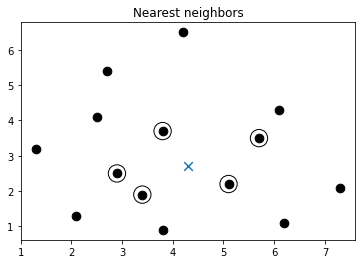

In [23]:
plt.figure() 
plt.title('Nearest neighbors') 
plt.scatter(X[:, 0], X[:, 1], marker='o', s=75, color='k') 
plt.scatter(X[indices][0][:][:, 0], X[indices][0][:][:, 1],  
        marker='o', s=300, color='k', facecolors='none') 
plt.scatter(test_datapoint[0], test_datapoint[1], 
        marker='x', s=75) 
 
plt.show() 

In [113]:
# 1K users with 4 features
nb_users = 1000
users = np.zeros(shape=(nb_users, 4))

for i in range(nb_users):
    users[i, 0] = rng.integers(4)
    users[i, 1] = rng.integers(2)
    users[i, 2] = rng.integers(5)
    users[i, 3] = rng.integers(5)

In [26]:
# 20 different items, each user purchased upto 5 of each.
nb_product = 20
user_products = rng.integers(nb_product, size=(nb_users, 5))

In [29]:
# Cluster using kNN. 20 neighbours with a Eucliean radius of 2.0.
# Tells us which items are contained in the ball who centre is a sample with 
# a fixed radius.
nn = NearestNeighbors(n_neighbors=20, radius=2.)

In [30]:
nn.fit(users)

NearestNeighbors(n_neighbors=20, radius=2.0)

In [52]:
# Get all the neighbours of a test user
test_user = np.array([2, 0, 3, 2])
dists, nbrs = nn.kneighbors(test_user.reshape(1, -1))
print(nbrs)

[[325  25 921 951 362 753 305 551 145 972 505 116 303 344 787 913  77 875
  526 333]]


In [53]:
suggested_products = []

for n in nbrs:
    for products in user_products[n]:
        for product in products:
            if product != 0 and product not in suggested_products:
                suggested_products.append(product)

print(suggested_products)

[3, 5, 18, 10, 14, 17, 9, 12, 19, 16, 8, 2, 15, 6, 1, 13, 7, 4, 11]


In [ ]:
aaaa

In [54]:
sd, sd_arg = np.sort(dists[0]), np.argsort(dists[0])

In [59]:
sd_arg

array([ 0,  1,  2,  3,  4,  5,  6,  7, 17, 16, 15, 14, 13,  9, 11, 10, 18,
        8, 12, 19])

In [62]:
user_products.shape

(1000, 5)

In [65]:
# Input data 
X = np.array(
    [[1, 1], 
     [1, 3], 
     [2, 2], 
     [2.5, 5], 
     [3, 1], 
     [4, 2], 
     [2, 3.5], 
     [3, 3], 
     [3.5, 4]]
)

In [78]:
# Find 3 closest neighbours to any given point.
num_neighbors = 3 

In [79]:
# Random input data point that isn't present in the data.
input_point = np.array([2.6, 1.7] )

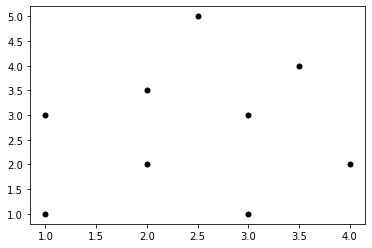

In [80]:
# Plot data
plt.figure() 
plt.scatter(X[:,0], X[:,1], marker='o', s=25, color='k') 

In [81]:
# Fit kNN
knn = NearestNeighbors(
    n_neighbors=num_neighbors, 
    algorithm='ball_tree'
).fit(X) 


In [82]:
distances, indices = knn.kneighbors(input_point.reshape(1, -1)) 

In [84]:
print("k nearest neighbors")
for rank, index in enumerate(indices[0][:num_neighbors]):
    print(str(rank+1) + " -->", X[index])

k nearest neighbors
1 --> [2. 2.]
2 --> [3. 1.]
3 --> [3. 3.]


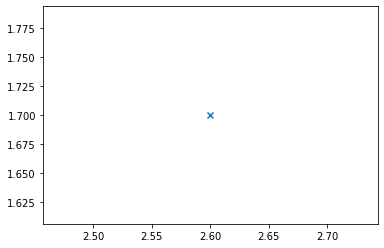

In [93]:
plt.scatter(input_point[0], input_point[1], marker='x')

In [95]:
input_point

array([2.6, 1.7])

Partition points on a Cartesian plane

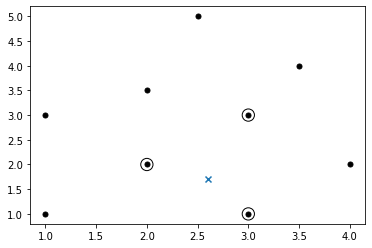

In [98]:
# plt.figure() 
plt.scatter(X[:,0], X[:,1], marker='o', s=25, color='k') 
plt.scatter(X[indices][0][:][:,0], X[indices][0][:][:,1],  
        marker='o', s=150, color='k', facecolors='none') 
plt.scatter(input_point[0], input_point[1], 
        marker='x') 
 
plt.show() 

In [ ]:
X = np.array([[2.1, 1.3], [1.3, 3.2], [2.9, 2.5], [2.7, 5.4], [3.8, 0.9],  
        [7.3, 2.1], [4.2, 6.5], [3.8, 3.7], [2.5, 4.1], [3.4, 1.9], 
        [5.7, 3.5], [6.1, 4.3], [5.1, 2.2], [6.2, 1.1]]) 